# Домашнее задание 2: Pandas и простые визуализации

В данном домашнем задании очень важно **внимательно** читать формулировку задания и все комментарии.

1. С помощью Pandas вызовом одной функции считайте набор данных из файла  'supermarket_sales.csv' , который лежит в папке `data`.

In [1]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')

2. Покажите первые 5 и последние 5 записей в наборе данных.

In [2]:
df.head(5).append(df.tail(5))

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


3. Выведите названия колонок в наборе данных вместе с их типами данных.

In [3]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

4. Сколько колонок имеют текстовый тип данных? Сколько колонок содержат числа (тип данных float/int)? Ответ нужно вывести с помощью использования функций Pandas. Ответ должен быть в формате: тип - количество таких колонок. Правильным выполнением будет в том числе, если две отдельные строки ответа будут содержать количество колонок типа float и количество колонок типа int.

In [4]:
df.dtypes.value_counts()

object     9
float64    7
int64      1
dtype: int64

5. Сколько всего покупок сделали мужчины, а сколько женщины? Ответ должен быть сгенерирован одной строчкой кода и содержаться в одной pd.Series. Вывести отдельно количество покупок мужчин и количество покупок женщин будет в данном задании ошибкой.
Подсказка: можно выполнить задание используя метод value_counts(), а можно - используя метод groupby()

In [5]:
df['Invoice ID'].groupby(df['Gender']).count()

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

6. Какие есть продуктовые линии в наборе данных? Вывести уникальные названия.

In [6]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

7. Какая средняя цена товара в каждой продуктовой линии? Сгенерировать ответ одной строчкой кода.  
Цена товара содержится в колонке `'Unit price'`

In [7]:
df.groupby('Product line')['Unit price'].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

8. Преобразуйте колонку Date в формат datetime.

In [8]:
df['Date'] =pd.to_datetime(df.Date)

9. C помощью команды plot() выведите линейный график сумы всех покупок за каждый день, что есть в наборе данных. Задайте линии зелёный цвет.   
В данном задании надо просуммировать значения колонки Total по дням и вывести на графике. Не забудьте подписать оси и дать графику название (`title`). К примеру, по оси ОУ у нас будет название 'Total amount', а заголовок графика 'Daily total samount of sales'. Но можете придумать и свои названия :)  
Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.

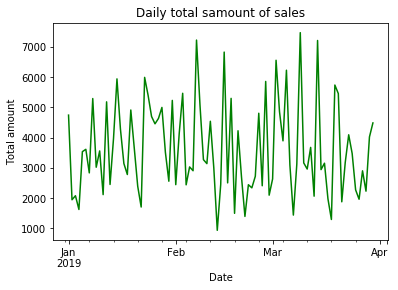

In [10]:
SumTotal = df['Total'].groupby(df['Date']).sum()
SumTotal.plot(title='Daily total samount of sales',color='green').set(ylabel='Total amount');

10. А теперь выведите на линейном графике подневно сколько продаж было сделано в каждой ветке (`Branch`). Задайте размер фигуры (10,6).
Должны быть три линии (по одной на ветвь) на одном графике.
Количеством продаж считаем количество `Invoice ID` в этот день.

Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.  
Один из способов выполнить это задание - сначала преобразовать данные в формат, где индексом выступает дата, колонками - названия ветвей, а значения - это количество продаж.   
Эту таблицу потом легко отрисовать функцией `DataFrame.plot()`.  
Для описанной трансформации данных используйте `pivot_table()`.

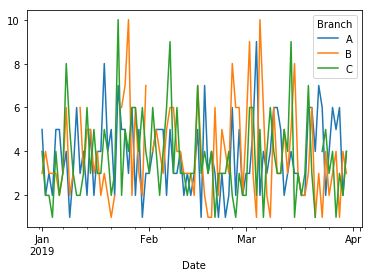

In [11]:
df1 = pd.pivot_table(df,index='Date',columns='Branch',values='Invoice ID',aggfunc='count')
df1.plot();

Кажется, на этом графике сложно что-то понять. 
Выведите динамику по каждой из ветвей на отдельный график.  
Максимально просто это сделать передав значение параметра `subplots=True` в функцию `plot()`.  
Задайте размер фигуры (10,10).

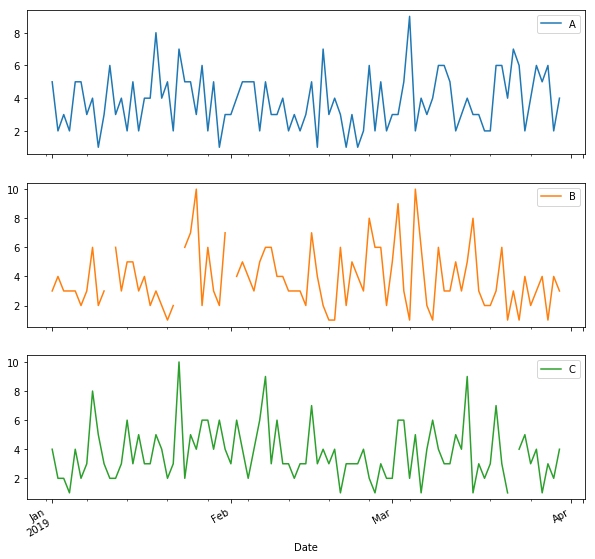

In [12]:
df1.plot(subplots=True,figsize=(10,10));

Удобнее было бы наверное смотреть на эти графики, если бы они были сглажены.  
Один из методов сглаживания - скользящее среднее (Moving Average - MA). Суть его в том, что в каждой точке значение равно среднему N предыдущих.  
Для того, чтоб посчитать скользящее среднее мы можем использовать функцию [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по ветвям. 

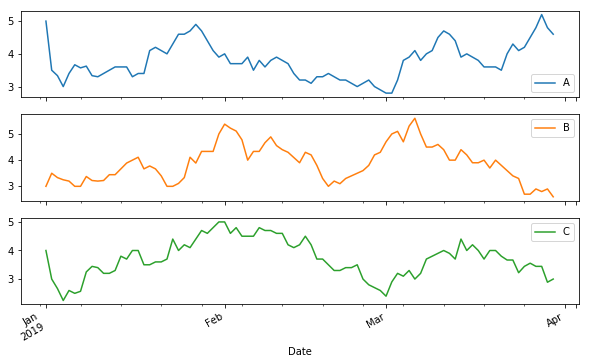

In [13]:
df1.rolling(window=10,min_periods=1).mean().plot(subplots=True,figsize=(10,6));

11. В каком городе расположена каждая из ветвей?

In [14]:
df['City'].groupby(df['Branch']).unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

12. В каком городе прдепочитают пользоваться для расчётов наличкой (`Cash`), а в каком - электронным кошельком (`Ewallet`)?  
Для выполнения этого задания сначала сформируйте таблицу, в которой строкам соответствуют способы оплаты (`City`), в столбцах - `Payment`, значения - количество покупок (они же - продажи).

Нас интересует процент покупок, сделанных каждым из способов. Потому после того, как таблица сформирована, нам надо разделить каждую колонку на сумму значений в ней. Это будет просто `DataFrame.sum()`.
В конце необходимо "разукрасить" таблицу, чтоб найти наибольшее и наименьшее значение по колонкам `Cash` и `Ewallet` соответственно.

In [15]:
dfPay=pd.pivot_table(df,index='City',columns='Payment',values='Invoice ID',aggfunc='count')
df2=dfPay[["Cash","Ewallet"]]/dfPay[['Cash','Ewallet']].sum()
df2.style.background_gradient()

Payment,Cash,Ewallet
City,,
Mandalay,0.319767,0.327536
Naypyitaw,0.360465,0.307246
Yangon,0.319767,0.365217


13. Посмотрим на распределение цен на товары. Выведите распределение цен в каждой из товарных групп на графике. В какой группе товаров больше всего дорогих товаров (от 90 до 100 у.е.)?

В ходе выполнения задания необходимо построить гистограмму распределения цен на товары в каждой группе. Возможно, будет удобно вывести все гистограммы на однйо фигуре, но можно и на разных.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


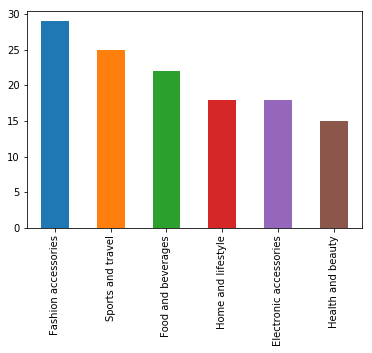

In [16]:
df[df['Unit price']>=90][df['Unit price']<=100]['Product line'].value_counts().plot(kind='bar');

14. Есть ли зависимость между ценой и рейтингом товаров группы "Health and beauty" ? Чтобы выяснить - отобразите график рассеянья и выведите коэффициент корреляции.

Если не видим линейных зависимостей на графике рассеянья, значит зависимости нет.  
Если коэффициент корреляции меньше 0.2 - значит зависимости нет.

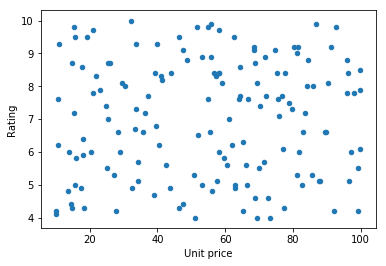

In [17]:
df[df['Product line']=='Health and beauty'].plot.scatter(x='Unit price',y='Rating');

In [18]:
df[df['Product line']=='Health and beauty'][['Unit price','Rating']].corr()

,Unit price,Rating
Unit price,1.000000,0.051836
Rating,0.051836,1.000000


15*. Опциональное, но желательное задание.   
Постройте все графики, фигурирующие в заданиях, с помощью seaborn.

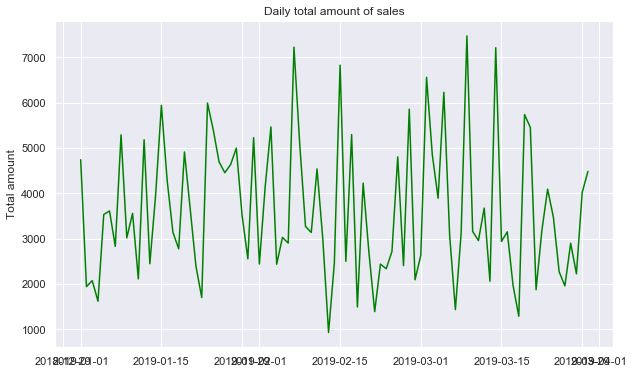

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(10,6)})

df3=df.groupby('Date')['Total'].sum()
sns.lineplot(data=df3,color='green').set(ylabel='Total amount',title='Daily total amount of sales')
plt.show()

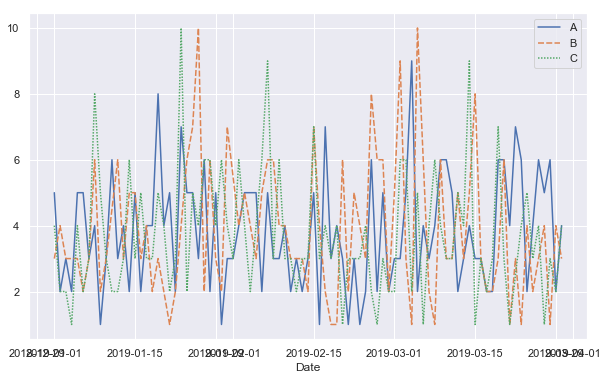

In [20]:
sns.lineplot(data=df1)
plt.show()

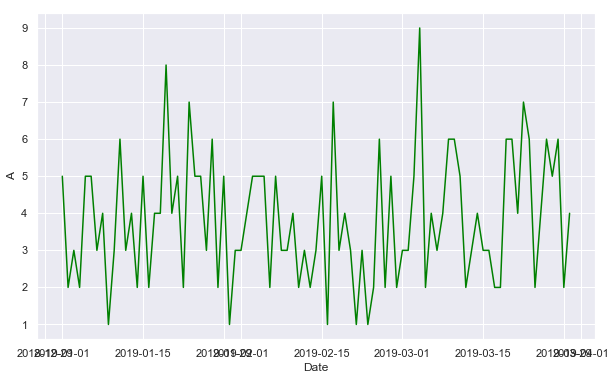

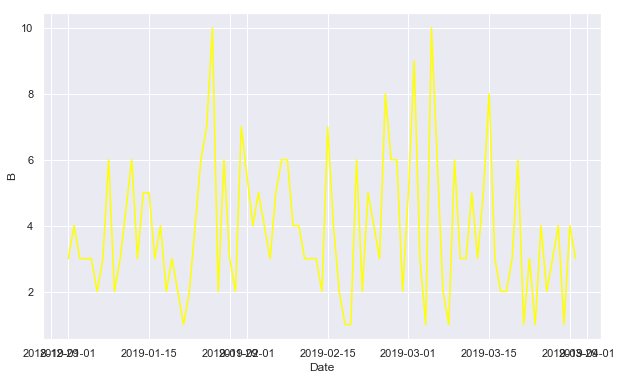

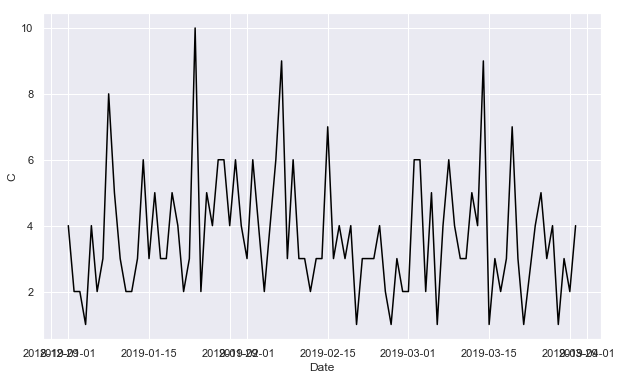

In [21]:
sns.lineplot(x=df1.index,data=df1,y="A",color='green')
plt.show()
sns.lineplot(x=df1.index,data=df1,y="B",color='yellow')
plt.show()
sns.lineplot(x=df1.index,data=df1,y="C",color='black')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


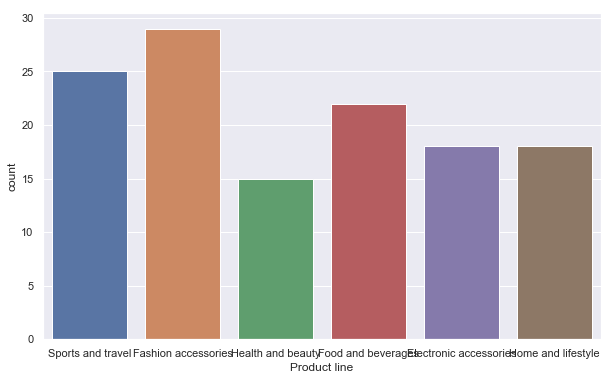

In [22]:
sns.countplot(x='Product line',data=df[df['Unit price']>90][df['Unit price']<=100]);

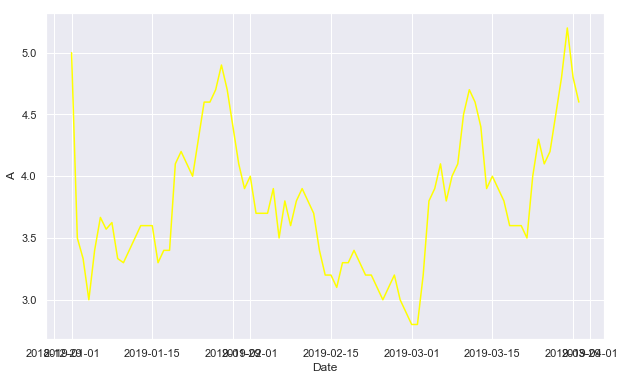

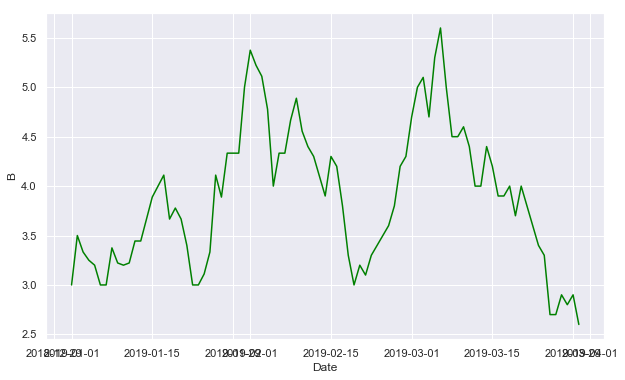

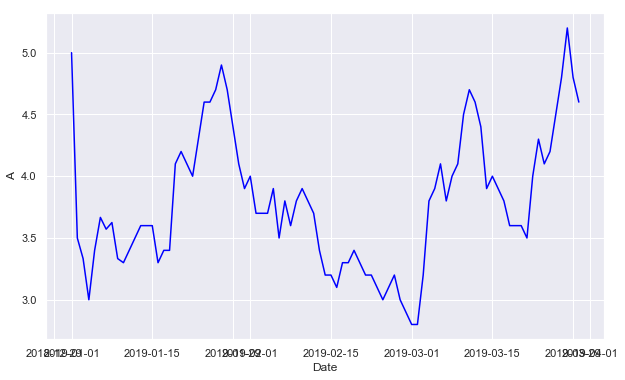

In [23]:
df2 = df1.rolling(window=10,min_periods=1).mean()
sns.lineplot(x=df2.index,y='A',data=df2,color='yellow')
plt.show()
sns.lineplot(x=df2.index,y='B',data=df2,color='green')
plt.show()
sns.lineplot(x=df2.index,y='A',data=df2,color='blue')
plt.show()

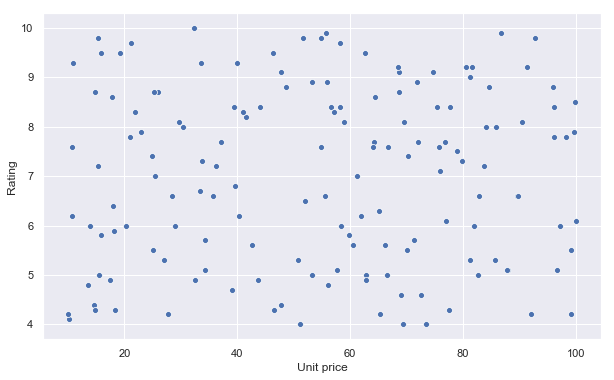

In [24]:
sns.scatterplot(data=df[df['Product line']=='Health and beauty'],x='Unit price',y='Rating');